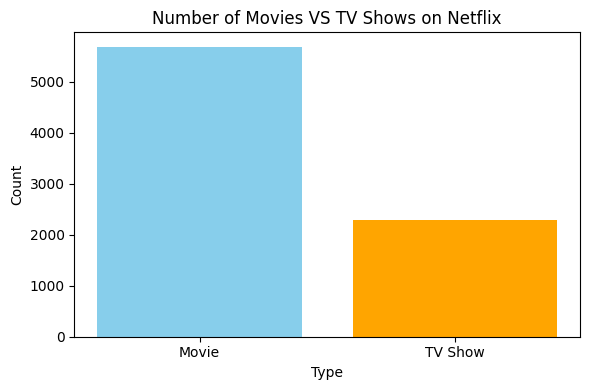

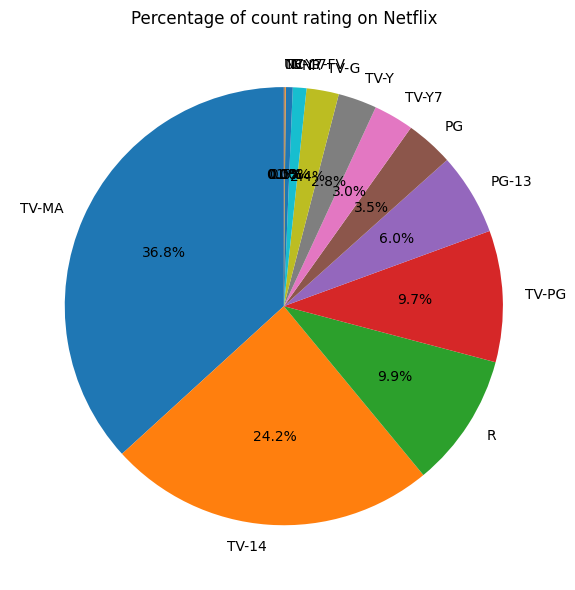

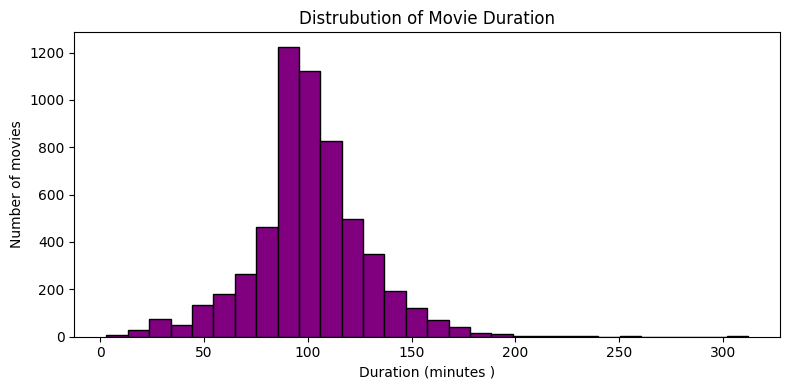

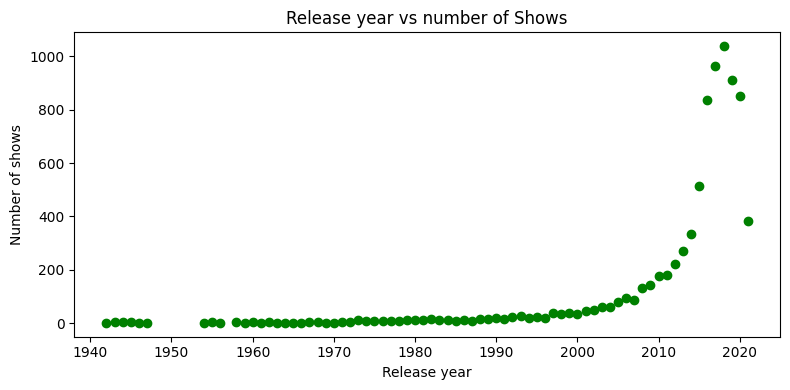

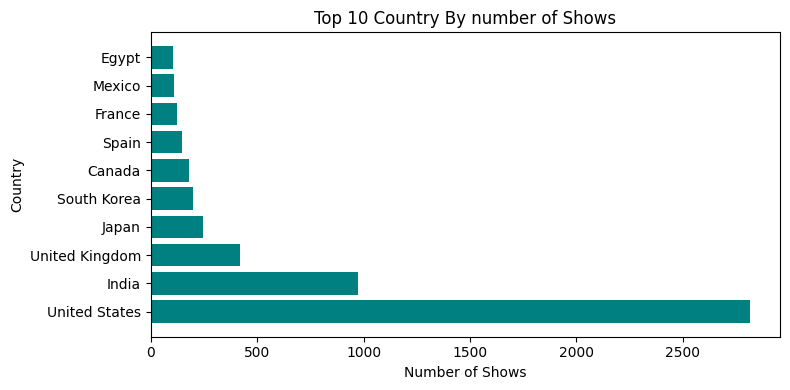

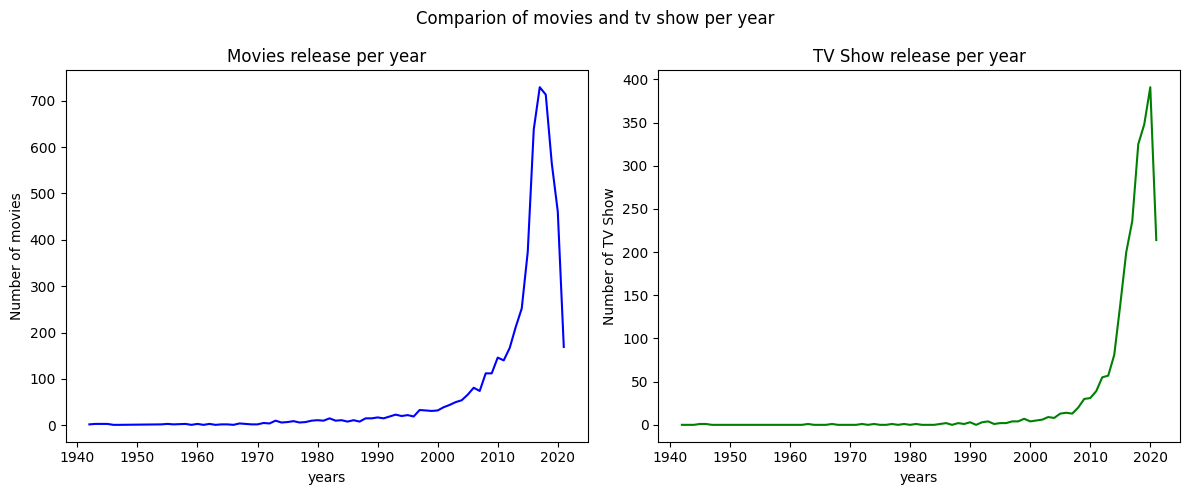

In [3]:
# 1st step import the libraies 
import pandas as pd 
import matplotlib.pyplot as plt

# 2nd step to lead the files

df=pd.read_csv("netflix_titles.csv")


# clean data
df=df.dropna(subset=['type', 'country', 
       'release_year', 'rating', 'duration', ])

type_count=df["type"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index,type_count.values,color=["skyblue","orange"])
plt.title("Number of Movies VS TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tv_show.png")
plt.show()


# rating on pie

rating_count=df["rating"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_count,labels=rating_count.index,autopct="%1.1f%%",startangle=90)
plt.title("Percentage of count rating on Netflix")

plt.tight_layout()
plt.savefig("counts_rating_pie.png")
plt.show()


movie_df=df[df["type"]=="Movie"].copy()
movie_df["duration_int"]=movie_df["duration"].str.replace("min"," ").astype(int)
plt.figure(figsize=(8,4))
plt.hist(movie_df["duration_int"],bins=30,color="purple",edgecolor="black")
plt.title("Distrubution of Movie Duration")
plt.xlabel("Duration (minutes )")
plt.ylabel("Number of movies")
plt.tight_layout()
plt.savefig("movies_duration_histogram.png")
plt.show()


relese_count=df["release_year"].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.scatter(relese_count.index,relese_count.values,color="green")
plt.title("Release year vs number of Shows")
plt.xlabel("Release year")
plt.ylabel("Number of shows")
plt.tight_layout()
plt.savefig("relese_year_scatter.png")
plt.show()


country_counts=df["country"].value_counts().head(10)
plt.figure(figsize=(8,4))
plt.barh(country_counts.index,country_counts.values,color="teal")
plt.title("Top 10 Country By number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("Top_10_country_show_horizontalBar.png")
plt.show()


countent_years=df.groupby(["release_year","type"]).size().unstack().fillna(0) # advane pandas

fig, ax= plt.subplots(1,2,figsize=(12,5))
# first subplot : movie
ax[0].plot(countent_years.index,countent_years["Movie"],color="blue")
ax[0].set_title("Movies release per year")
ax[0].set_xlabel("years")
ax[0].set_ylabel("Number of movies")


# first subplot : TV Show
fig, ax[1].plot(countent_years.index,countent_years["TV Show"],color="green")
ax[1].set_title("TV Show release per year")
ax[1].set_xlabel("years")
ax[1].set_ylabel("Number of TV Show")

plt.suptitle("Comparion of movies and tv show per year")

plt.tight_layout()
plt.savefig("movies_tv_show_comparion_year.png")
plt.show()